In [1]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

In [2]:
data = pd.read_csv("E:\\YAO\\GLM\\Analysis_bank_4000sp.csv")
data['intercept'] = 1.0
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,intercept
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,1.0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,1.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,1.0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0,1.0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,1.0


In [176]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,intercept
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.0
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695,0.109493,1.0
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904,0.312294,0.0
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000,1.0
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000,1.0
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,1.0
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,1.0
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,1.0


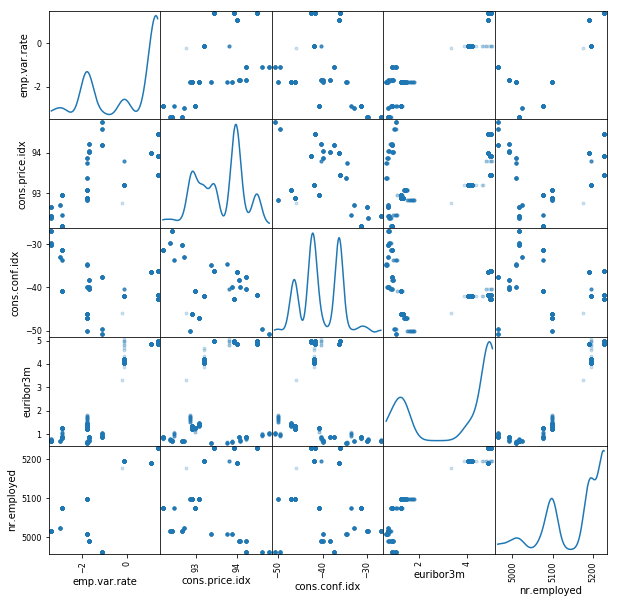

In [21]:
data_conti = ['duration','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
data_cor = data[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
scatter_matrix(data_cor,alpha=0.2,figsize=(10,10),diagonal='kde')
plt.show()


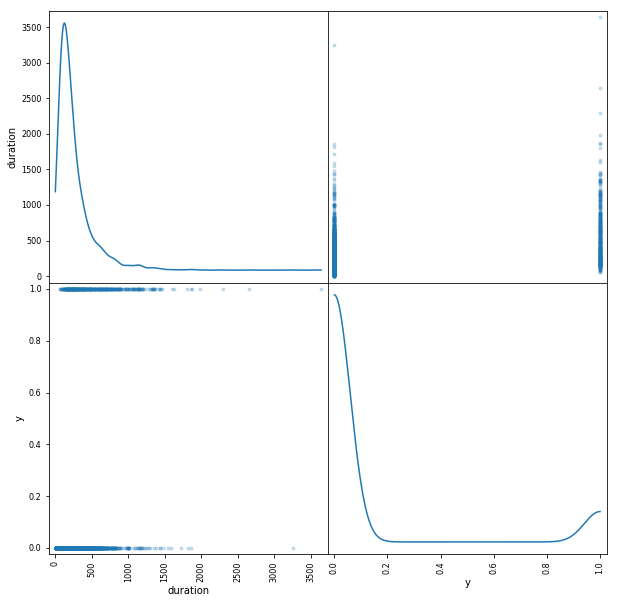

In [42]:

data_cor = data[['duration','y']]
scatter_matrix(data_cor,alpha=0.2,figsize=(10,10),diagonal='kde')
plt.show()

In [22]:
data_conti = ['age','duration','campaign','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

X_name_ls = []
coef_ls = []
cov_ls = []
stderr_ls = []
z_ls = []
p_ls = []
ci_95_ls = []
OR_ls = []
for i in data_conti:
    data1 = data[['intercept',i,'y']]
    train_cols = data1.columns[0:2]
    logit = sm.Logit(data1['y'], data1[train_cols])
    result = logit.fit()

    coef_pd = pd.DataFrame(result.params)
    X_name = coef_pd.index[1] #變數名稱
    #result.fittedvalues 這是model帶入後後的值
    #result.predict() 期望機率(死亡機率)
    #result.conf_int() 新賴區間
    coef = list(result.params)[1] #找出coef
    OR = np.exp(coef)
    cov = result.cov_params()  #找出std err
    stderr = np.matrix(cov)[1,1] #找出std err
    z = list(result.tvalues)[1] #找出z值
    p = list(result.pvalues)[1] #找出P>|z|
    ci_95 = list(np.array(result.conf_int())[1])  #找出 [95.0% Conf. Int.]
    X_name_ls.append(X_name)
    coef_ls.append(coef)
    cov_ls.append(cov)
    stderr_ls.append(stderr)
    z_ls.append(z)
    p_ls.append(p)
    ci_95_ls.append(ci_95)
    OR_ls.append(OR)
    

print("==========================================================================================")#14 7 11 
print("                 coef       OR      std err          z      P>|z|       [95.0% Conf. Int.]")
print("------------------------------------------------------------------------------------------")
for i in range(len(X_name_ls)):
    print("%-15s%8.4f%8.3f%11.5f%11.3f%11.5f%14.5f - %8.5f"%(X_name_ls[i],coef_ls[i],OR_ls[i],stderr_ls[i],z_ls[i],p_ls[i],ci_95_ls[i][0],ci_95_ls[i][1]))
print("==========================================================================================")

Optimization terminated successfully.
         Current function value: 0.343689
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.282314
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.341451
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323459
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.308321
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340666
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.343990
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.303788
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293257
         Iterations 7
                 coef       OR      std err          z      P>|z|       [95.0% Con

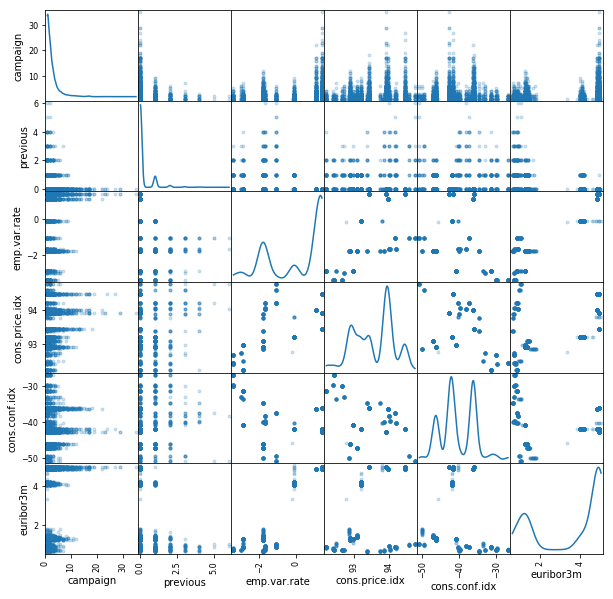

In [49]:
#有意義的
data_cor = data[['campaign','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']]
scatter_matrix(data_cor,alpha=0.2,figsize=(10,10),diagonal='kde')
plt.show()


In [43]:
data_catog = ['marital','education']

data1 = data[['intercept','marital','y']]
data1 = data1.loc[data1['marital']!='unknown']
dummy_ranks = pd.get_dummies(data1['marital'],'marital')
print(dummy_ranks.head())


   marital_divorced  marital_married  marital_single
0                 0                1               0
1                 0                0               1
2                 0                1               0
3                 0                1               0
4                 0                1               0


In [40]:
cols_to_keep = ['intercept']
data2 = data1[cols_to_keep].join(dummy_ranks.ix[:, 0:2])
data2 = data2.join(data1.ix[:,'y'])
data2.head()

,intercept,marital_divorced,marital_married,y
0,1.0,0,1,0
1,1.0,0,0,0
2,1.0,0,1,0
3,1.0,0,1,0
4,1.0,0,1,0


In [41]:
train_cols = data2.columns[0:3]
logit = sm.Logit(data2['y'], data2[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.344354
         Iterations 6


In [42]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4108
Model:                          Logit   Df Residuals:                     4105
Method:                           MLE   Df Model:                            2
Date:                Tue, 25 Apr 2017   Pseudo R-squ.:                0.003483
Time:                        18:44:54   Log-Likelihood:                -1414.6
converged:                       True   LL-Null:                       -1419.6
                                        LLR p-value:                  0.007121
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
intercept           -1.8623      0.086    -21.571      0.000        -2.032    -1.693
marital_divorced    -0.3754      0.182     -2.061      0.039        -0.732    -0.018
marital_married     -0.3300 

In [47]:
data1 = data[['intercept','education','y']]
data1 = data1.loc[data1['education']!='unknown']
dummy_ranks = pd.get_dummies(data1['education'],'edu')
print(dummy_ranks.head())

   edu_basic.4y  edu_basic.6y  edu_basic.9y  edu_high.school  edu_illiterate  \
0             0             0             1                0               0   
1             0             0             0                1               0   
2             0             0             0                1               0   
3             0             0             1                0               0   
4             0             0             0                0               0   

   edu_professional.course  edu_university.degree  
0                        0                      0  
1                        0                      0  
2                        0                      0  
3                        0                      0  
4                        0                      1  


In [48]:
cols_to_keep = ['intercept']
data2 = data1[cols_to_keep].join(dummy_ranks.ix[:, 0:])
data2 = data2.join(data1.ix[:,'y'])
data2.head()

,intercept,edu_basic.4y,edu_basic.6y,edu_basic.9y,edu_high.school,edu_illiterate,edu_professional.course,edu_university.degree,y
0,1.0,0,0,1,0,0,0,0,0
1,1.0,0,0,0,1,0,0,0,0
2,1.0,0,0,0,1,0,0,0,0
3,1.0,0,0,1,0,0,0,0,0
4,1.0,0,0,0,0,0,0,1,0


In [56]:
train_cols = data2.columns[0:-1]
logit = sm.Logit(data2['y'], data2[train_cols])
result = logit.fit()
print(result.summary())

         Current function value: 0.338876
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3952
Model:                          Logit   Df Residuals:                     3945
Method:                           MLE   Df Model:                            6
Date:                Tue, 25 Apr 2017   Pseudo R-squ.:                0.007225
Time:                        18:50:19   Log-Likelihood:                -1339.2
converged:                      False   LL-Null:                       -1349.0
                                        LLR p-value:                  0.003408
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
intercept                  -3.9017   2.28e+06  -1.71e-06      1.000     -4.47e+06  4.47e+06
edu_basic.4y              

C:\Users\jean\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [57]:
print('---------------------')

---------------------


In [205]:
data1 = data[['intercept','education','y']]
data1 = data1.loc[data1['education']!='unknown']
dummy_ranks = pd.get_dummies(data1['education'],'edu')
print(dummy_ranks.head())

cols_to_keep = ['intercept']
data2 = data1[cols_to_keep].join(dummy_ranks.ix[:, 1:])
data2 = data2.join(data1.ix[:,'y'])
#print("-----")
#print(data2.head())

train_cols = data2.columns[0:-1]
logit = sm.Logit(data2['y'], data2[train_cols])
result = logit.fit()
print(result.summary())

   edu_basic.4y  edu_basic.6y  edu_basic.9y  edu_high.school  edu_illiterate  \
0             0             0             1                0               0   
1             0             0             0                1               0   
2             0             0             0                1               0   
3             0             0             1                0               0   
4             0             0             0                0               0   

   edu_professional.course  edu_university.degree  
0                        0                      0  
1                        0                      0  
2                        0                      0  
3                        0                      0  
4                        0                      1  
         Current function value: 0.338876
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:     

C:\Users\kao\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [37]:
data1 = data[['intercept','poutcome','y']]
data1 = data1.loc[data1['poutcome']!='nonexistent']
dummy_ranks = pd.get_dummies(data1['poutcome'],'poutcome')
print(dummy_ranks.head())
print('---------------------------------')
cols_to_keep = ['intercept']
data2 = data1[cols_to_keep].join(dummy_ranks.ix[:, 1:])
data2 = data2.join(data1.ix[:,'y'])
print(data2.head())
print("---------------------------------")
train_cols = data2.columns[0:-1]
logit = sm.Logit(data2['y'], data2[train_cols])
result = logit.fit()
print(result.summary())

    poutcome_failure  poutcome_success
5                  1                 0
8                  1                 0
21                 0                 1
27                 1                 0
30                 1                 0
---------------------------------
    intercept  poutcome_success  y
5         1.0                 0  0
8         1.0                 0  0
21        1.0                 1  1
27        1.0                 0  0
30        1.0                 0  0
---------------------------------
Optimization terminated successfully.
         Current function value: 0.473344
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  596
Model:                          Logit   Df Residuals:                      594
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 Apr 2017   Pseudo R-squ.:                

In [38]:
print(pd.crosstab(data['y'], data['poutcome']))

poutcome  failure  nonexistent  success
y                                      
0             387         3231       50
1              67          292       92


In [32]:
data1 = data[['intercept','pdays','y']]
data2 = data1.loc[data1['pdays']!=999]
#dummy_ranks = pd.get_dummies(data1['day_of_week'],'day_of_week')
#print(dummy_ranks.head())
#print('---------------------------------')
#cols_to_keep = ['intercept']
#data2 = data1[cols_to_keep].join(dummy_ranks.ix[:, 1:])
#data2 = data2.join(data1.ix[:,'y'])
print(data2.head())
print("---------------------------------")
train_cols = data2.columns[0:-1]
logit = sm.Logit(data2['y'], data2[train_cols])
result = logit.fit()
print(result.summary())

    intercept  pdays  y
21        1.0     12  1
53        1.0      3  1
62        1.0      6  1
68        1.0      5  1
83        1.0      2  0
---------------------------------
Optimization terminated successfully.
         Current function value: 0.656309
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  160
Model:                          Logit   Df Residuals:                      158
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 Apr 2017   Pseudo R-squ.:                0.007943
Time:                        23:03:20   Log-Likelihood:                -105.01
converged:                       True   LL-Null:                       -105.85
                                        LLR p-value:                    0.1947
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------

In [34]:
print(pd.crosstab(data['y'], data['pdays']))

pdays  0    1    2    3    4    5    6    7    9    10   ...   12   13   14   \
y                                                        ...                   
0        0    3    3   13    9    0   15    2    2    2  ...     2    2    1   
1        2    0    1   39    5    4   27    8    1    6  ...     3    0    0   

pdays  15   16   17   18   19   21    999  
y                                          
0        1    2    1    1    0    0  3608  
1        1    0    0    1    1    1   351  

[2 rows x 21 columns]


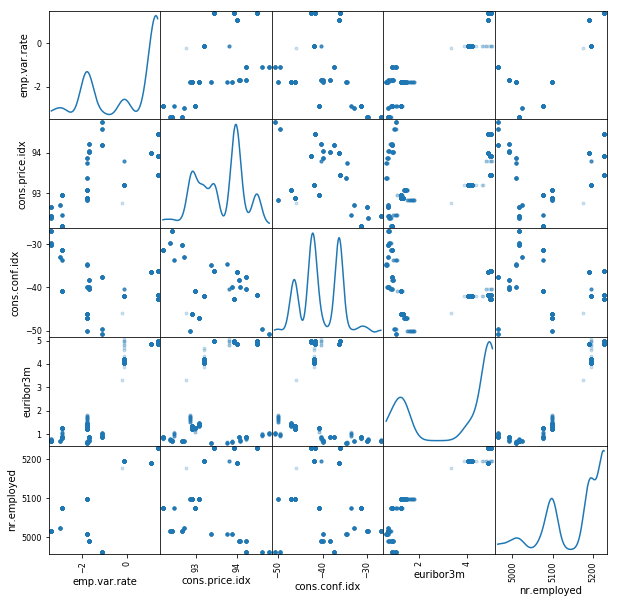

In [39]:
#social and economic context attributes
data_cor = data[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
scatter_matrix(data_cor,alpha=0.2,figsize=(10,10),diagonal='kde')
plt.show()

In [64]:
np.corrcoef(data['euribor3m'],data['nr.employed'])


array([[ 1.        ,  0.94258928],
       [ 0.94258928,  1.        ]])

In [58]:
glo = sm.GLM(data['cons.price.idx'],data['cons.conf.idx'])

In [59]:
r = glo.fit()

In [60]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         cons.price.idx   No. Observations:                 4119
Model:                            GLM   Df Residuals:                     4118
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                    112.17075592
Method:                          IRLS   Log-Likelihood:                -15565.
Date:                Wed, 26 Apr 2017   Deviance:                   4.6192e+05
Time:                        00:49:36   Pearson chi2:                 4.62e+05
No. Iterations:                     4                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
cons.conf.idx    -2.2812      0.004   -563.440      0.000        -2.289    -2.273
=================================================================================
"""

In [111]:
data1 = data[['intercept','poutcome','y']]
data1 = data1.loc[data1['poutcome']!='nonexistent']
dummy_ranks1 = pd.get_dummies(data1['poutcome'],'poutcome')
print(dummy_ranks1.head())
print('---------------------------------')
data2 = data[['intercept','contact','y']]
data2 = data2.loc[data2['contact']!='nonexistent']
dummy_ranks2 = pd.get_dummies(data2['contact'],'contact')
print(dummy_ranks2.head())
print('---------------------------------')

cols_to_keep = ['intercept','cons.price.idx']
data3 = data[cols_to_keep]
data3 = data3.join(dummy_ranks1.ix[:, 1:])
data3 = data3.join(dummy_ranks2.ix[:, 1:])
data3 = data3.join(data.ix[:,'y'])
print(data3.head())
data3 = data3.loc[data3.ix[:,'poutcome_success']==True]
print(data3.head())
print("---------------------------------")
train_cols = data3.columns[0:-1]
logit = sm.Logit(data3['y'], data3[train_cols])
result = logit.fit()
print(result.summary())


    poutcome_failure  poutcome_success
5                  1                 0
8                  1                 0
21                 0                 1
27                 1                 0
30                 1                 0
---------------------------------
   contact_cellular  contact_telephone
0                 1                  0
1                 0                  1
2                 0                  1
3                 0                  1
4                 1                  0
---------------------------------
   intercept  cons.price.idx  poutcome_success  contact_telephone  y
0        1.0          92.893               NaN                  0  0
1        1.0          93.994               NaN                  1  0
2        1.0          94.465               NaN                  1  0
3        1.0          94.465               NaN                  1  0
4        1.0          93.200               NaN                  0  0
    intercept  cons.price.idx  poutcome_success  c

LinAlgError: Singular matrix

In [206]:
data1 = data[['intercept','previous','campaign','euribor3m','marital','contact','y']]
data1 = data1.loc[data1['marital']!='unknown']
data1 = data1.loc[data1['contact']!='nonexistent']
dummy_ranks1 = pd.get_dummies(data1['marital'],'marital')
dummy_ranks2 = pd.get_dummies(data1['contact'],'contact')

data2 = data1[['intercept','previous','euribor3m']].join(dummy_ranks1.ix[:, :-1])
data2 = data2.join(dummy_ranks2.ix[:, 1:])
data2 = data2.join(data1['y'])
#print(data2.head())

train_cols = data2.columns[0:-1]
logit = sm.Logit(data2['y'], data2[train_cols])
result = logit.fit()
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.298826
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4108
Model:                          Logit   Df Residuals:                     4102
Method:                           MLE   Df Model:                            5
Date:                Wed, 26 Apr 2017   Pseudo R-squ.:                  0.1352
Time:                        04:56:20   Log-Likelihood:                -1227.6
converged:                       True   LL-Null:                       -1419.6
                                        LLR p-value:                 8.555e-81
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
intercept            -0.7899      0.129     -6.104      0.000        -1.043    -0.536
previous

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [174]:
1-(-1229.2)/(-1422.9)

0.13613043783821777

In [207]:
vif_t = data2[['previous','marital_divorced','marital_married','euribor3m','contact_telephone']]



In [141]:
a = [1, 1, 2, 3, 4]
b = [2, 2, 3, 2, 1]
c = [4, 6, 7, 8, 9]
d = [4, 3, 4, 5, 4]

ck = np.column_stack([a, b, c, d])

vif = [variance_inflation_factor(ck, i) for i in range(ck.shape[1])]
print(vif)


[47.136986301369774, 28.931506849315081, 80.31506849315096, 40.438356164383549]


In [208]:
vif_a = np.array(vif_t)
vif_a
a=[]
b=[]
c=[]
d=[]
e=[]
for i in range(len(vif_t)):
    a.append(vif_a[i][0])
    b.append(vif_a[i][1])
    c.append(vif_a[i][2])
    d.append(vif_a[i][3])
    e.append(vif_a[i][4])

In [209]:
ck = np.column_stack([a, b, c,d,e])

vif = [variance_inflation_factor(ck, i) for i in range(ck.shape[1])]
print(vif)


[1.1001888016088828, 1.2760982713714939, 2.5722831373999511, 3.4296021395272751, 1.8395768605579501]


In [216]:
print('VIF')
print('previous     marital_divorced    marital_married     euribor3m    contact_telephone')
print('-----------------------------------------------------------------------------------')
print('%8.3f%21.3f%19.3f%14.3f%21.3f'%(vif[0],vif[1],vif[2],vif[3],vif[4]))
print('-----------------------------------------------------------------------------------')

VIF
previous     marital_divorced    marital_married     euribor3m    contact_telephone
-----------------------------------------------------------------------------------
   1.100                1.276              2.572         3.430                1.840
-----------------------------------------------------------------------------------


In [177]:
2277      + 1391



3668

In [178]:
375      +   76

451

In [179]:
451/(3668+451)

0.10949259529011895